<a href="https://colab.research.google.com/github/HumanitiesDataAnalysis/code20/blob/master/APIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with APIs

APIs--Application Programming Interfaces--are things that organizations expose for *working with* their data.

Here we'll look a few offered by cultural heritage organizations.

APIs often--though not always!--work over the web. They also often--though not always!--use JSON or XML to send the data to you.

## HTRC Feature Reader

## Installation

Most APIs don't require installation. But the first thing we looked at, for the Hathi Trust, is a little more heavy duty, and does. They won't be pre-installed on Google Colab like the stuff we've done so far!

Inside Jupyter notebooks, you can install using pip--the "python package installer".

There is also something out there called `conda`, which works much like `pip` (E.g., you'd type `conda install htrc-feature-reader`). Conda doesn't support as many packages, but for a home-computing environment can provide additionally stability. For starters, and especially in colab, you can just work with pip; if you find yourself using python for more than one or two projects, it might be time to switch to conda.  


In [ ]:
!pip install htrc-feature-reader

     |████████████████████████████████| 61kB 3.3MB/s 
     |████████████████████████████████| 1.4MB 7.6MB/s 
     |████████████████████████████████| 235kB 50.8MB/s 
  Created wheel for htrc-feature-reader: filename=htrc_feature_reader-2.0.7-cp36-none-any.whl size=40425 sha256=aa4f58e496ab9f8556a3342c53999e275f1c965f1fbcffb5348d430237c24bba
  Stored in directory: /root/.cache/pip/wheels/44/f0/b7/3d8eac07e7e078731fd3521d5ceda301dcb88495a8f29f4a7e
  Created wheel for pymarc: filename=pymarc-4.0.0-cp36-none-any.whl size=152522 sha256=65eae12597dd5d139685b27dd2eb759005b8860c9e921c4e84345ddba1ee1b9d
  Stored in directory: /root/.cache/pip/wheels/cc/a3/96/1b75ce89df5ac52aa77249b9c7ab07f05c15d57d958a5c3a91
Successfully built htrc-feature-reader pymarc


In [ ]:
from htrc_features import Volume 

In [ ]:
g = Volume("mdp.39076002651854")

In [ ]:
tokenlist = g.tokenlist()

Inspect this object. How can we work with it?

We'll take a way of just walking through the rows one at a time.

In [ ]:
from collections import Counter

wordcounts = Counter()

for index, row in tokenlist.iterrows():
  POS = index[3]
  token = index[2]
  count = row
  break



In [ ]:
# A faster way to do it in pandas.

t = tokenlist.reset_index()
t = t[t.pos == "NNP"]
t.groupby(['token'])['count'].sum().sort_values()

token
7o               1
Meet             1
Memoriam         1
Mermish          1
Met              1
              ... 
Voldemort      464
Dumbledore     588
Ron           1286
Hermione      1325
Harry         3416
Name: count, Length: 1292, dtype: uint32

# National Archives

In [ ]:
import urllib.request
import urllib.parse
import json
import time


# The national archives describe their API here.

In [ ]:
base_url = "https://catalog.archives.gov/api/v1/?"


Like Hathi, you can search the National Archives by id. (It's called 'naid' here.) But you can also search by terms, which may be more useful; or you can do hybrid searches. The one below searches for objects that have a jpeg file attached. You have to understand the schema of their data, but once you do, you can create extremely detailed queries.

In [ ]:
values = {
    'description.file.@mime': 'image/jpeg', 
    "rows": 30,
    "q": "photograph"
}

not_done_yet = True
round = 1
parameters = urllib.parse.urlencode(values)
parameters

'description.file.%40mime=image%2Fjpeg&rows=30&q=photograph'

In [ ]:
print(urllib.request.urlopen(base_url + data).read())

In [ ]:
results = json.load(urllib.request.urlopen(base_url + data))

In [ ]:
# Once you get something, we can use the keys method of a dictionary to see how it's structured.
results.keys()

dict_keys(['opaResponse'])

In [ ]:
results['opaResponse'].keys()

dict_keys(['@status', 'time', 'request', 'results'])

In [ ]:
results['opaResponse']['results']['result'][0]

{'description': {'fileUnit': {'accessRestriction': {'status': {'naId': '10031403',
     'termName': 'Unrestricted'}},
   'coverageDates': {'coverageEndDate': {'logicalDate': '1872-12-31T00:00:00',
     'year': '1872'},
    'coverageStartDate': {'logicalDate': '1872-01-01T00:00:00',
     'year': '1872'}},
   'dataControlGroup': {'groupCd': 'RDTP1',
    'groupId': 'ou=RDTP1,ou=groups',
    'groupName': 'National Archives at Washington, DC - Textual Reference'},
   'generalRecordsTypeArray': {'generalRecordsType': {'naId': '10035676',
     'termName': 'Textual Records'}},
   'isAv': 'false',
   'isUnderEdit': 'false',
   'itemAvCount': '0',
   'itemCount': '0',
   'naId': '109326871',
   'parentSeries': {'creatingOrganizationArray': {'creatingOrganization': [{'creator': {'abolishDate': {'day': '1',
         'logicalDate': '1931-07-01T00:00:00',
         'month': '7',
         'year': '1931'},
        'establishDate': {'day': '21',
         'logicalDate': '1930-07-21T00:00:00',
         'm

## Met Museum

The Metropolitan Museum's API is not as rich as the National Archives, but is structured at the item level.

> At this time, we do not require API users to register or obtain an API key to use the service. Please limit request rate to 80 requests per second.

As described here: https://metmuseum.github.io/#search

In [ ]:
id = 1993
endpoint = f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{id}'
json.load(urllib.request.urlopen(endpoint))

{'GalleryNumber': '774',
 'accessionNumber': '10.125.700',
 'accessionYear': '1910',
 'additionalImages': ['https://images.metmuseum.org/CRDImages/ad/original/10658.jpg'],
 'artistAlphaSort': '',
 'artistBeginDate': '',
 'artistDisplayBio': '',
 'artistDisplayName': '',
 'artistEndDate': '',
 'artistGender': '',
 'artistNationality': '',
 'artistPrefix': '',
 'artistRole': '',
 'artistSuffix': '',
 'artistULAN_URL': '',
 'artistWikidata_URL': '',
 'city': '',
 'classification': 'Furniture',
 'constituents': None,
 'country': 'United States',
 'county': 'Connecticut River Valley',
 'creditLine': 'Gift of Mrs. Russell Sage, 1909',
 'culture': 'American',
 'department': 'The American Wing',
 'dimensions': '26 1/2 x 48 1/2 x 20 3/4 in. (67.3 x 123.2 x 52.7 cm)',
 'dynasty': '',
 'excavation': '',
 'geographyType': 'Made in',
 'isHighlight': False,
 'isPublicDomain': True,
 'isTimelineWork': False,
 'linkResource': '',
 'locale': '',
 'locus': '',
 'measurements': [{'elementDescription': No

3291


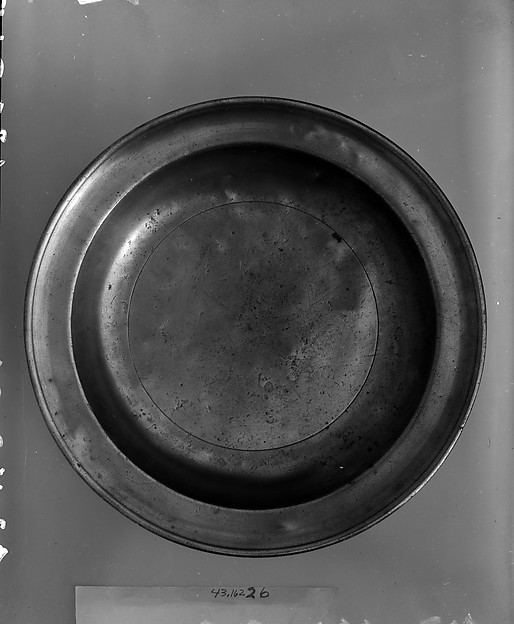

In [ ]:
import random


id = random.randint(0, 10000)
print(id)
endpoint = f'https://collectionapi.metmuseum.org/public/collection/v1/objects/{id}'

metadata = json.load(urllib.request.urlopen(endpoint))

import PIL
from PIL import Image
metadata = json.load(urllib.request.urlopen(endpoint))
Image.open(urllib.request.urlopen(metadata['primaryImageSmall']))

In [ ]:
Geonames